The hyposthesis of this Notebook is to:
    
* Predict how many medals a team will win in the olympics

Steps:

1. For the hyposthesis -- given above
2. Find the data
3. Reshape the data
4. Cleaning the data
5. Error metric -- Evaluate the machine learning model -- make
   predictions -- We use MAE.
6. Split the data -- Training and Test sets
7. Train the model -- Linear regression
    

Let's Dive in!!!

In [2]:
import pandas as pd

In [4]:
original_data = pd.read_csv('athlete_events.csv')
original_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# team level data

teams = pd.read_csv('teams.csv')
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [14]:
teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [15]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


We will use the athletes and the previous_medals column to predict medals

In [21]:
# Check the correlation between the medals and other columns

teams.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

We see that the **athletes** and **prev_medals** are highly correlated to the our target column **medals** since there value is strongly closer to 1.

This makes these columns the best for the prediction

In [22]:
import seaborn as sns

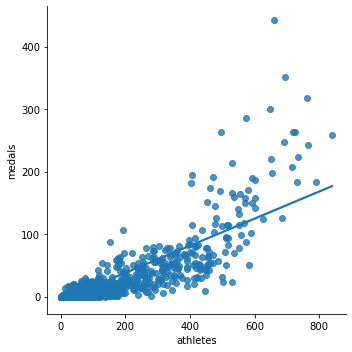

In [24]:
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

As the number of athletes increases, the medals also increase -- Perfect!!

Histogram to check how many coutries fall into each bin for each number of medals they get

<AxesSubplot:ylabel='Frequency'>

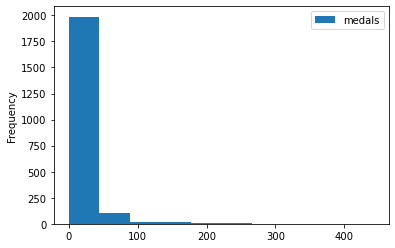

In [28]:
teams.plot.hist(y='medals')

We see that almost 2000 countries have earned between 0 and 50 medals

Very few countries that have earned alot of medals

This suggest an **Imbalance** in our data -- This can negatively impact our model's performance. We will look at dealing with imbalanced data in a later notebook.

Check for missing data

In [32]:
teams.isnull().any()

team           False
country        False
year           False
athletes       False
age            False
prev_medals     True
medals         False
dtype: bool

So there's missing data in the **prev_medals** column

We will drop the rows with missing data for now

In [33]:
teams = teams.dropna()

In [34]:
teams.isnull().sum()

team           0
country        0
year           0
athletes       0
age            0
prev_medals    0
medals         0
dtype: int64

No missing values!! Yey!!

## Modelling

### Splitting the dataset

Take **Note** that our data is Time Series data.

So we will split the data into training and test sets. We will take the latest two years as the **test set** and the other past years as **train set**

In [40]:
train = teams[teams['year'] < 2012].copy() # train set
test = teams[teams['year'] >= 2012].copy() # test set

print(f"Train data Shape: {train.shape}, Test data Shape: {test.shape}")

Train data Shape: (1609, 7), Test data Shape: (405, 7)


### Train the model

In [45]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

predictors = ['athletes', 'prev_medals']
target = 'medals'

regressor.fit(train[predictors], train['medals']) # train

LinearRegression()

In [51]:
predictions = regressor.predict(test[predictors])
test['predictions'] = predictions

test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [53]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

test['predictions'] = test['predictions'].round()

In [54]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


Check the MAE

In [61]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['medals'], test['predictions'])

print(f"MAE: {mae}, \nDescription: \n{teams.describe()['medals']}")


MAE: 3.2987654320987656, 
Description: 
count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64


The MAE is below the **standard deviaition(std)**

Check the difference in what the model has predicted

In [64]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [67]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [72]:
# check the absolute error

errors = (test['medals'] - test['predictions']).abs()

In [73]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [74]:
errors_by_team = errors.groupby(test['team']).mean()
errors_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [75]:
medals_by_team = test['medals'].groupby(test['team']).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [77]:
error_ratio = errors_by_team / medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [79]:
# remove the NAN -- caused by some divisions by zero

error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [81]:
# REmove the infintes
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

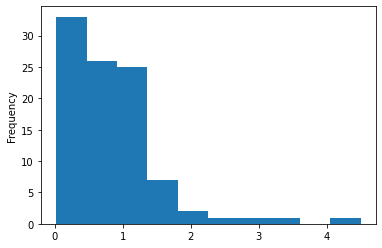

In [82]:
error_ratio.plot.hist()

In [83]:
# Check countries that get a lot of medals

error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

To improve the model's performance:

* We can add more predictors -- features
* Use another algorithm eg Random Forests...
* Try different models...
* Reshaping the data

....etc


